1.1) Modelo Inicial


Epoch 1/100
1189/1189 [==============================] - 4s 2ms/step - loss: 0.3358 - accuracy: 0.8546 - val_loss: 0.2373 - val_accuracy: 0.9042
Epoch 2/100
1189/1189 [==============================] - 3s 2ms/step - loss: 0.2213 - accuracy: 0.9166 - val_loss: 0.2099 - val_accuracy: 0.9193
Epoch 3/100
1189/1189 [==============================] - 2s 2ms/step - loss: 0.2039 - accuracy: 0.9221 - val_loss: 0.2388 - val_accuracy: 0.9089
Epoch 4/100
1189/1189 [==============================] - 3s 2ms/step - loss: 0.1917 - accuracy: 0.9268 - val_loss: 0.1916 - val_accuracy: 0.9307
Epoch 5/100
1189/1189 [==============================] - 3s 3ms/step - loss: 0.1827 - accuracy: 0.9309 - val_loss: 0.1506 - val_accuracy: 0.9527
Epoch 6/100
1189/1189 [==============================] - 2s 2ms/step - loss: 0.1757 - accuracy: 0.9326 - val_loss: 0.3370 - val_accuracy: 0.8682
Epoch 7/100
1189/1189 [==============================] - 2s 2ms/step - loss: 0.1704 - accuracy: 0.9352 - val_loss: 0.2068 - val_ac

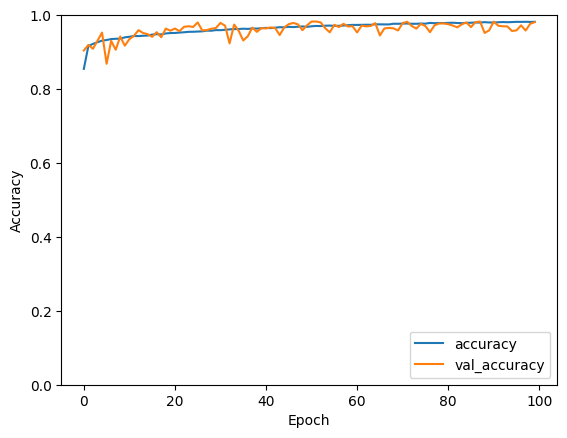

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN


pd.set_option('display.max_columns', None)
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1Lma-amQu0WjV-PCAr2LOe377H99z4BoR')

X = df.drop('y', axis=1)
y = df['y']



# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Criar o modelo da rede neural
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Para classificação binária
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Para classificação binária
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Avaliar o modelo
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_acc}')

# Plotar a curva de aprendizado (opcional)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

249/249 [==============================] - 0s 1ms/step


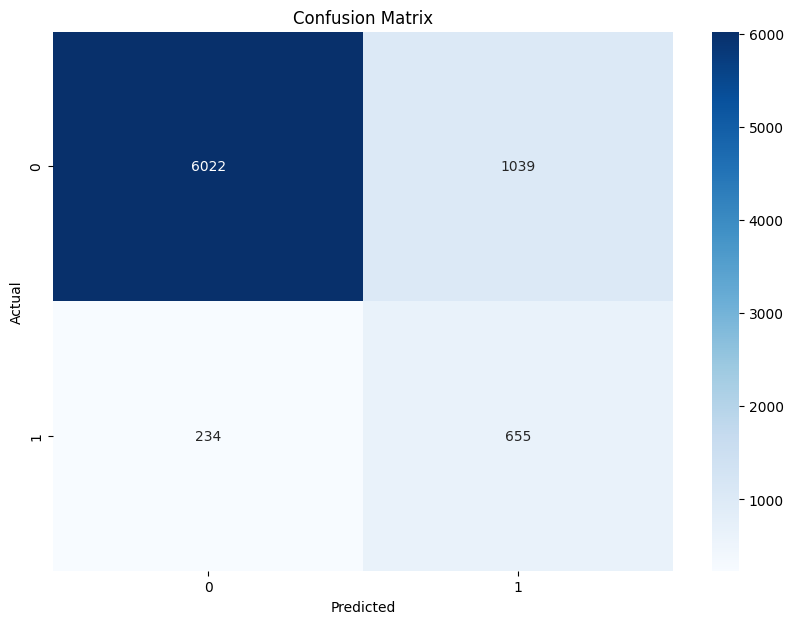

              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90      7061
         1.0       0.39      0.74      0.51       889

    accuracy                           0.84      7950
   macro avg       0.67      0.79      0.71      7950
weighted avg       0.90      0.84      0.86      7950

AUC-ROC: 0.8690584651284826
Precision: 0.38665878772735596
Recall: 0.7367829084396362
F1 Score: 0.5071621537208557


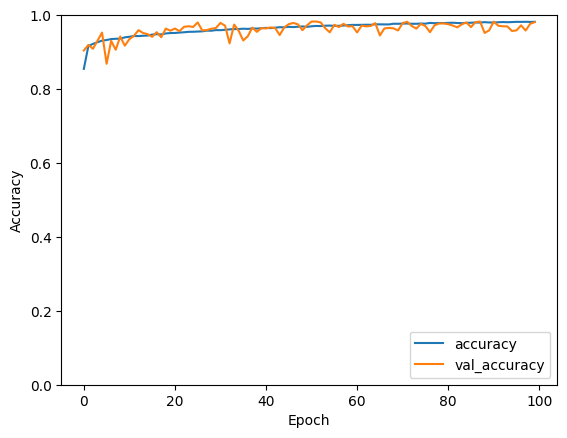

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predições no conjunto de teste
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Relatório de classificação
report = classification_report(y_test, y_pred)
print(report)

# Cálculo do AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC-ROC: {auc_roc}')

# Funções para calcular métricas adicionais
def precision(y_true, y_pred):
    return tf.keras.metrics.Precision()(y_true, y_pred)

def recall(y_true, y_pred):
    return tf.keras.metrics.Recall()(y_true, y_pred)

def f1_score(y_true, y_pred):
    precision_val = precision(y_true, y_pred)
    recall_val = recall(y_true, y_pred)
    return 2 * ((precision_val * recall_val) / (precision_val + recall_val + tf.keras.backend.epsilon()))

# Calcular as métricas adicionais
precision_val = precision(y_test, y_pred)
recall_val = recall(y_test, y_pred)
f1_val = f1_score(y_test, y_pred)

print(f'Precision: {precision_val}')
print(f'Recall: {recall_val}')
print(f'F1 Score: {f1_val}')

# Plotar a curva de aprendizado (opcional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

1.2) Otimização de Hiperparâmetros e Resampling

Trial 30 Complete [00h 01m 23s]
val_accuracy: 0.897169828414917

Best val_accuracy So Far: 0.900628924369812
Total elapsed time: 00h 15m 42s

Melhor número de unidades na primeira camada oculta: 416
Melhor taxa de aprendizado para o otimizador: 0.001

Epoch 1/100
795/795 [==============================] - 5s 5ms/step - loss: 0.2415 - accuracy: 0.8939 - val_loss: 0.2432 - val_accuracy: 0.8909
Epoch 2/100
795/795 [==============================] - 4s 5ms/step - loss: 0.2200 - accuracy: 0.9011 - val_loss: 0.2410 - val_accuracy: 0.8967
Epoch 3/100
795/795 [==============================] - 4s 5ms/step - loss: 0.2119 - accuracy: 0.9022 - val_loss: 0.2365 - val_accuracy: 0.8943
Epoch 4/100
795/795 [==============================] - 3s 4ms/step - loss: 0.2069 - accuracy: 0.9060 - val_loss: 0.2360 - val_accuracy: 0.8921
Epoch 5/100
795/795 [==============================] - 5s 6ms/step - loss: 0.2037 - accuracy: 0.9068 - val_loss: 0.2393 - val_accuracy: 0.8959
Epoch 6/100
795/795 [============

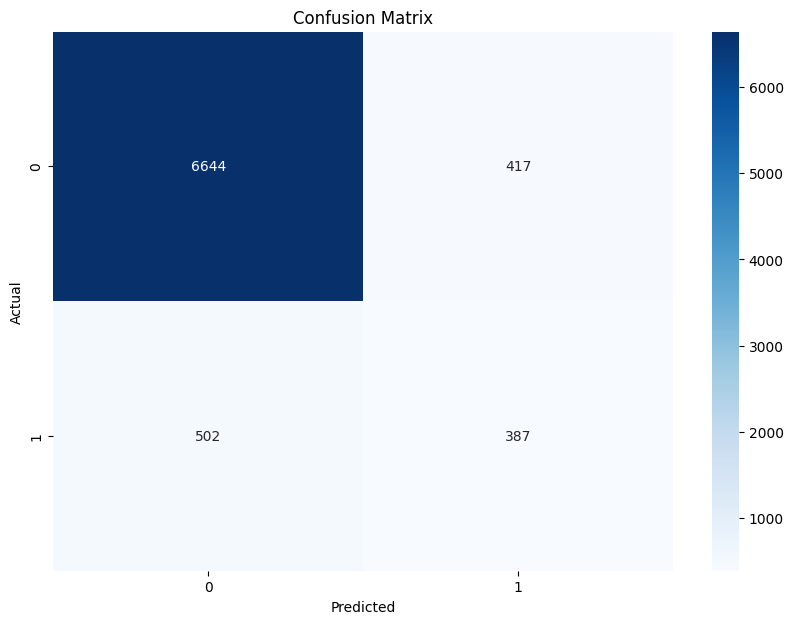

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      7061
         1.0       0.48      0.44      0.46       889

    accuracy                           0.88      7950
   macro avg       0.71      0.69      0.70      7950
weighted avg       0.88      0.88      0.88      7950

AUC-ROC: 0.8685858043413742
Precision: 0.48134326934814453
Recall: 0.43532058596611023
F1 Score: 0.45717653632164


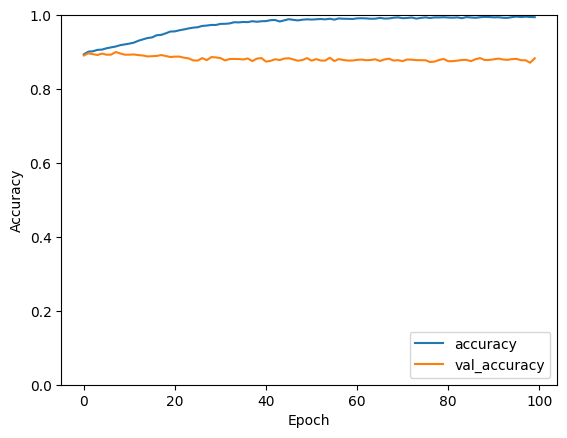

In [ ]:
# Importar as bibliotecas necessárias
!pip install keras-tuner

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt

# Carregar o dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1Lma-amQu0WjV-PCAr2LOe377H99z4BoR')


# Supondo que a última coluna é o alvo e o resto são características
X = df.drop('y', axis=1)
y = df['y']

# Dividir o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados (opcional, mas recomendado)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir a função de construção do modelo
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(
        units=hp.Int('units', min_value=32, max_value=512, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))
    model.add(layers.Dense(
        units=hp.Int('units', min_value=32, max_value=512, step=32),
        activation='relu'
    ))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Configurar o Keras Tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='my_dir',
    project_name='intro_to_kt'
)

# Executar a busca pelos melhores hiperparâmetros
tuner.search(X_train, y_train, epochs=50, validation_split=0.2)

# Obter os melhores hiperparâmetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Melhor número de unidades na primeira camada oculta: {best_hps.get('units')}
Melhor taxa de aprendizado para o otimizador: {best_hps.get('learning_rate')}
""")

# Treinar o modelo com os melhores hiperparâmetros
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

# Avaliar o modelo
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_acc}')

# Predições no conjunto de teste
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Relatório de classificação
report = classification_report(y_test, y_pred)
print(report)

# Cálculo do AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC-ROC: {auc_roc}')

# Funções para calcular métricas adicionais
def precision(y_true, y_pred):
    return tf.keras.metrics.Precision()(y_true, y_pred)

def recall(y_true, y_pred):
    return tf.keras.metrics.Recall()(y_true, y_pred)

def f1_score(y_true, y_pred):
    precision_val = precision(y_true, y_pred)
    recall_val = recall(y_true, y_pred)
    return 2 * ((precision_val * recall_val) / (precision_val + recall_val + tf.keras.backend.epsilon()))

# Calcular as métricas adicionais
precision_val = precision(y_test, y_pred)
recall_val = recall(y_test, y_pred)
f1_val = f1_score(y_test, y_pred)

print(f'Precision: {precision_val}')
print(f'Recall: {recall_val}')
print(f'F1 Score: {f1_val}')

# Plotar a curva de aprendizado (opcional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
